In [2]:
import numpy as np
data = np.genfromtxt('wine.data', delimiter=',')
y = data[:,0]
x = data[:,1:]
data

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
ans_nonscale = []
res_nonscale = [0, 0]
for i in range(1, 51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    quality = cross_val_score(neigh, x, y, cv=kf, scoring='accuracy')
    ans_nonscale.append(np.mean(quality))
    if ans_nonscale[-1] > res_nonscale[1]:
        res_nonscale[1] = ans_nonscale[-1]
        res_nonscale[0] = i
print(res_nonscale)
graph_nonscale = plt.plot(list(range(1, 51)), ans_nonscale)
print(graph_nonscale)


[1, 0.7304761904761905]


[29, 0.9776190476190475]


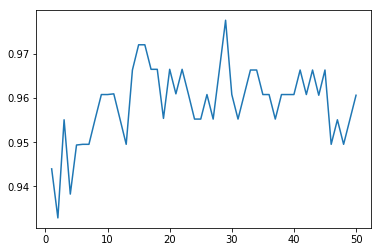

In [6]:
from sklearn.preprocessing import scale
ans_scale = []
x_sc = scale(x)
res_scale = [0, 0]
for i in range(1, 51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    quality = cross_val_score(neigh, x_sc, y, cv=kf, scoring='accuracy')
    ans_scale.append(np.mean(quality))
    if ans_scale[-1] > res_scale[1]:
        res_scale[1] = ans_scale[-1]
        res_scale[0] = i
print(res_scale)
graph_scale = plt.plot(list(range(1, 51)), ans_scale)
print(graph_scale)


In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
bstn = sklearn.datasets.load_boston()
x = sklearn.preprocessing.scale(bstn['data'], axis=0)
y = bstn['target']
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
ans = []
steps = np.linspace(1, 10, num=200)
res = [0, -500]
for pm in steps:
    neigh = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance', p=pm)
    quality = cross_val_score(neigh, x, y, cv=kf, scoring='neg_mean_squared_error')
    ans.append(np.mean(quality))
    if ans[-1] > res[1]:
        res[1] = ans[-1]
        res[0] = i
# graph = plt.plot(steps, ans)
# print(graph)
print(res)

AttributeError: module 'sklearn' has no attribute 'datasets'

In [4]:
import numpy as np
from sklearn.linear_model import Perceptron
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 0])
clf = Perceptron()
clf.fit(X, y)
predictions = clf.predict(X)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = np.array([[100.0, 2.0], [50.0, 4.0], [70.0, 6.0]])
X_test = np.array([[90.0, 1], [40.0, 3], [60.0, 4]])
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
import numpy as np
import sklearn
# scaler init
scaler = sklearn.preprocessing.StandardScaler()
# data downloading
data = np.genfromtxt('perceptron-train.csv', delimiter=',')
data2 = np.genfromtxt('perceptron-test.csv', delimiter=',')
ytrn = data[:,0]
Xtrn_nonscaled = data[:,1:]
ytst = data2[:,0]
Xtst_nonscaled = data2[:,1:]
# Data scaling
Xtrn_scaled = scaler.fit_transform(Xtrn_nonscaled)
Xtst_scaled = scaler.transform(Xtst_nonscaled)
# Perceptron learning for nonscaled data
clf = sklearn.linear_model.Perceptron()
clf.fit(Xtrn_nonscaled, ytrn)
# Prediction by nonscaled data
predictions_nonscaled = clf.predict(Xtst_nonscaled)
# Accuracy of prediction
accur_nonscaled = sklearn.metrics.accuracy_score(ytst, predictions_nonscaled)
# Perceptron learning for scaled data
clf.fit(Xtrn_scaled, ytrn)
# Prediction by scaled data
predictions_scaled = clf.predict(Xtst_scaled)
# Accuracy of prediction
accur_scaled = sklearn.metrics.accuracy_score(ytst, predictions_scaled)
accur_scaled - accur_nonscaled

0.18999999999999995